<a href="https://colab.research.google.com/github/lasupernova/Tensorflow_apps/blob/master/Food_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ensure GPU compute capability is > 7.0 in order to use mixed precision training acceleration
# here: Tesla T4 needed
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-6cac16de-3fd0-c2bc-9c41-222e3c56eb69)


In [2]:
#download helper functions script from Github
!wget https://raw.githubusercontent.com/lasupernova/Tensorflow_apps/master/helpers.py

--2021-10-03 00:49:59--  https://raw.githubusercontent.com/lasupernova/Tensorflow_apps/master/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10252 (10K) [text/plain]
Saving to: ‘helpers.py’

helpers.py          100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-03 00:49:59 (34.5 MB/s) - ‘helpers.py’ saved [10252/10252]



In [3]:
import tensorflow as tf

In [4]:
#import helper functions from script
from helpers import create_tensorboard_callback, plot_loss_curves#, compare_histories

##Load Data

In [5]:
#import tf Datasets to download Food 101 dataset using later on 
import tensorflow_datasets as tfds

In [6]:
#overview of all available datasets
datasets_list = tfds.list_builders()

In [7]:
datasets_list;

In [8]:
#load food101 data from tf Datasets
(train_data, test_data), food_info = tfds.load(name="food101",
                                               split=["train", "validation"],
                                               shuffle_files=True,
                                               as_supervised=True,
                                               with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteOIJJM1/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteOIJJM1/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


##Explore Data

In [9]:
#get to know dataset
food_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [10]:
#get class names
class_names = food_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [11]:
train_data

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [12]:
import matplotlib.pyplot as plt
def explore_data(num_images=9):
  for i in range(num_images):
    train_sample_explore = train_data.take(1)
    # train_sample_explore
    #each sample comes with data (here: image) and a label
    for img, label in train_sample_explore:
      # print(label)  #label is a tensor containing the image class number --> convert to number/np-array (using numpy) in order to translate to class_name
      shape = img.shape
      datatype= img.dtype.name
      img_label = class_names[label.numpy()]
      #Get min and max values in image tensor
      min_val = tf.reduce_min(img); max_val=tf.reduce_max(img)
      normalized = (min_val.numpy()==0 and max_val.numpy()==1)
      normalized_str = "True (min:0, max:1)" if normalized else f'False (value range: {min_val.numpy()} - {max_val.numpy()})'
      info_str = f"""Image has the following features:
          Shape:       {shape}
          dtype:       {datatype}
          Class Name:  {img_label}
          Dataset target class tensor form: {label}
          Normalized:  {normalized_str}"""
    #Plot selected image
    ax=plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(img_label)
    plt.text(x=shape[1]*1.05,y=shape[0]/2,s=info_str)
    ax=plt.gca()
    ax.set_axis_off()  #or use plt.axis(False)
    plt.show()

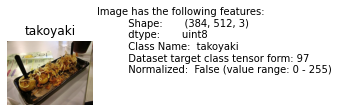

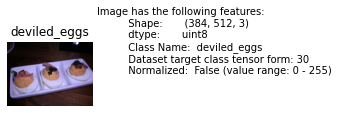

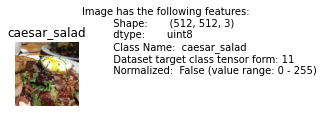

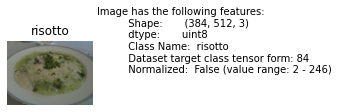

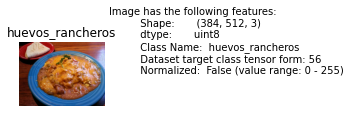

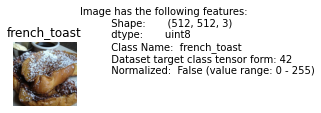

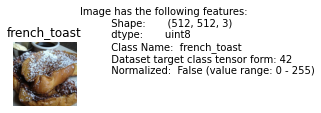

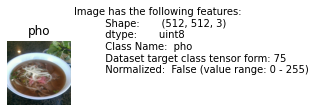

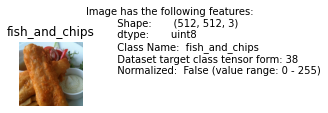

In [13]:
explore_data()

NOTE: image tensor is not yet normalized (as min - max values are not 0 and 1)

NOTE: dataset labels are *NOT* one-hot encoded as the target class tensor contains **one** individual number as opposed to aan array/ a list of the form [0,0,0,1....,0,0]. <br><br>
Additionally, running the cell above for multiple images has shown, that images are *not* of same shape (for height and width).

##Pre-process Images

In [14]:
#pre-processing function (instead of using tf.keras.preprocessing.image_dataset_from_directory)
def preprocess_image(img, label, img_size=224, scale=False):
  """
  Takes image and preprocesses it to standard image, inluding:
    datatype (float32),
    shape([img_size, img_size, color_channel])
    normalization (shouldvalues be scaled to values between 0 - 1)

  Params:
    img - tensor containing image to be preprocessed
    label - number representing class of image
    img_size - number to use for image width and height
    scale - bool to determine if tensor should be normalized (default : True)

  Returns:
    mod_img - modified, preprocessed image
  """
  mod_img = tf.image.resize(img, [img_size, img_size]) #resize height + width
  if scale:
    mod_img = mod_img/255. #normalize
  return tf.cast(mod_img, tf.float32), label  #return float32 -version of modified tensor (could have been, e.g.  uint8 before, but NNs need float32)

In [15]:
test_img = train_data.take(1)

In [16]:
test_img

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [17]:
for img, label in test_img:
  mod, t_label = preprocess_image(img, class_names[label.numpy()], 224, scale=False)

In [18]:
mod, t_label

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[178.64285, 184.64285, 198.64285],
         [179.15083, 185.15083, 199.15083],
         [179.64285, 185.64285, 199.64285],
         ...,
         [169.84662, 177.84662, 196.84662],
         [168.43301, 176.43301, 195.43301],
         [167.64285, 175.64285, 194.64285]],
 
        [[181.92857, 187.92857, 201.92857],
         [181.92857, 187.92857, 201.92857],
         [182.24554, 188.24554, 202.24554],
         ...,
         [173.24553, 181.24553, 200.24553],
         [171.71873, 179.71873, 198.71873],
         [170.92857, 178.92857, 197.92857]],
 
        [[183.63553, 189.63553, 203.63553],
         [184.21428, 190.21428, 204.21428],
         [184.28221, 190.28221, 204.28221],
         ...,
         [175.74553, 183.74553, 202.74553],
         [174.21873, 182.21873, 201.21873],
         [173.42857, 181.42857, 200.42857]],
 
        ...,
 
        [[160.78574, 165.78574, 184.78574],
         [159.99556, 164.99556, 183.99556]

## Batch and Prepare Datasets

In [19]:
#map custom preprocessing function to train dataset
"""NOTE: each entry in the dataset consists of 2 parts (a tensor and a label) 
--> the undefined params from the passed function, must also be 2, so that this function will know which input to map to which params
--> more params can be used in fucntion, however these need to have default values (which will then be used during the mapping call)
"""
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

#map custom preprocessing function to test dataset
test_data = test_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

In [20]:
#shuffle training data and group into batches
train_data = train_data.shuffle(buffer_size=5000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
#shuffle testinging data and group into batches
test_data = test_data.shuffle(buffer_size=5000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
train_data

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

NOTE: an additional dimension (for batching) is now added in the dataset

## Modelling callbacks creation

In [22]:
# Create TensorBoard callback (already have "create_tensorboard_callback()" from a previous notebook)
from helpers import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      montior="val_acc", 
                                                      save_best_only=True, 
                                                      save_weights_only=True, 
                                                      verbose=0) 

In [23]:
# #set up mixed precision training --> will only work with Tesla T4 GPU -- comment out otherwise
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy("mixed_float16")

## Build Model

In [24]:
#feature extraction model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#add changes (functional model)
inputs = layers.Input(shape=input_shape, name="input")
# x = preprocessing.Rescaling(1./255)(x)  #uncomment if chosen model does not have built-in rescaling
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="globavgpool")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", name="softmax_output")(x)  #if mixed precision is enables and used, use instead: layers.Activation("softmax", name="softmax_output", dtype=tf.float32)(x)
model = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [25]:
#compile model
model.compile(
    loss="sparse_categorical_crossentropy",  #use "sparse_categorical_crossentropy" instead of "categorical_crossentropy" when using int classes instead of one-hot-encoded classes
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
globavgpool (GlobalAveragePo (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_output (Activation)  (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [27]:
for layer in model.layers:
  print(f"Name: {layer.name:>15}, Trainable: {layer.trainable:>1}, dtype: {layer.dtype}, dtype policy: {layer.dtype_policy}")

Name:           input, Trainable: 1, dtype: float32, dtype policy: <Policy "float32">
Name:  efficientnetb0, Trainable: 0, dtype: float32, dtype policy: <Policy "float32">
Name:     globavgpool, Trainable: 1, dtype: float32, dtype policy: <Policy "float32">
Name:           dense, Trainable: 1, dtype: float32, dtype policy: <Policy "float32">
Name:  softmax_output, Trainable: 1, dtype: float32, dtype policy: <Policy "float32">


In [28]:
# #check dtype specs of all layers within the base model (is integrated at index 1 of current model)
# for layer in model.layers[1].layers:
#   print(f"Name: {layer.name:>20}, Trainable: {layer.trainable:>1}, dtype: {layer.dtype}, dtype policy: {layer.dtype_policy}")

In [41]:
#fit model
history_101_big_food_vision = model.fit(
    train_data,
    epochs=3,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[create_tensorboard_callback("training_logs", "efficientnetb0_101"),
               model_checkpoint]
)

Saving TensorBoard log files to: training_logs/efficientnetb0_101/20211003-012708
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 339s 136ms/step - loss: 1.0447 - accuracy: 0.7268 - val_loss: 1.0989 - val_accuracy: 0.6999
Epoch 2/3
2368/2368 [==============================] - 345s 138ms/step - loss: 0.9743 - accuracy: 0.7446 - val_loss: 1.0702 - val_accuracy: 0.7100
Epoch 3/3
2368/2368 [==============================] - 318s 130ms/step - loss: 0.9149 - accuracy: 0.7578 - val_loss: 1.0516 - val_accuracy: 0.7140


In [60]:
model.evaluate(test_data)

790/790 [==============================] - 106s 123ms/step - loss: 1.0653 - accuracy: 0.7112


[1.0652505159378052, 0.7111682891845703]

In [53]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
globavgpool (GlobalAveragePo (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_output (Activation)  (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [65]:
# Clone the model we created --> resets all weights
cloned_model = tf.keras.models.clone_model(model)
cloned_model.summary()

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
globavgpool (GlobalAveragePo (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_output (Activation)  (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [69]:
checkpoint_path

'model_checkpoints/cp.ckpt'

In [70]:
# Load checkpointed weights into cloned_model
cloned_model.load_weights(checkpoint_path)

In [ ]:
for i in base_model.layers:
  print(i.name, i.dtype_policy)

In [71]:
cloned_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [72]:
cloned_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
globavgpool (GlobalAveragePo (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_output (Activation)  (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [54]:
test_data

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [73]:
cloned_model.evaluate(test_data)

790/790 [==============================] - 111s 123ms/step - loss: 1.7112 - accuracy: 0.5557


[1.7111984491348267, 0.5556831955909729]

Compared to previous model:<br>
790/790 [==============================] - 105s 121ms/step - loss: 1.0653 - accuracy: 0.7112<br>
[1.0652507543563843, 0.7111682891845703]

In [75]:

# # Loaded checkpoint weights should return very similar results to checkpoint weights prior to saving
# NOTE: does not work rn as output from .evaluate() has not been saved in variable
#import numpy as np
# assert np.isclose(results_feature_extract_model, results_cloned_model_with_loaded_weights).all() # check if all elements in array are close

## Fine-tuning

In [76]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2021-10-03 02:06:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M  45.8MB/s    in 0.4s    

2021-10-03 02:06:11 (45.8 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [77]:
# Unzip the SavedModel downloaded from Google Stroage
!mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [ ]:
downloaded_model = tf.keras.models.load_model('downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision')

In [84]:
downloaded_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [85]:
downloaded_model.evaluate(test_data)

790/790 [==============================] - 100s 110ms/step - loss: 1.0881 - accuracy: 0.7065


[1.0880857706069946, 0.7065346240997314]

In [89]:
for i in downloaded_model.layers:
  i.trainable=True
  print(i.name, i.dtype_policy)

input_layer <Policy "float32">
efficientnetb0 <Policy "mixed_float16">
pooling_layer <Policy "mixed_float16">
dense <Policy "mixed_float16">
softmax_float32 <Policy "float32">


In [88]:
#change dtype policies from mixed to "float32", as no GPU T4 available
tf.keras.mixed_precision.set_global_policy('float32')

In [92]:
checkpoint_path2 = 'model_checkpoints/cp2.ckpt'

In [90]:
downloaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 4,136,929
Non-trainable params: 42,023
_________________________________________________________________


In [94]:
#set up Earlystopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

#set up ModelCheckpoint
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path2,
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None
)

In [97]:
downloaded_model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [98]:
downloaded_model.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[early_stop,
               model_checkpoint]
)

Epoch 1/100
2368/2368 [==============================] - 1205s 487ms/step - loss: 0.9230 - accuracy: 0.7524 - val_loss: 0.8180 - val_accuracy: 0.7757
Epoch 2/100
2368/2368 [==============================] - 1145s 476ms/step - loss: 0.5811 - accuracy: 0.8383 - val_loss: 0.8184 - val_accuracy: 0.7760
Epoch 3/100
2368/2368 [==============================] - 1138s 476ms/step - loss: 0.3373 - accuracy: 0.9035 - val_loss: 0.8766 - val_accuracy: 0.7786
Epoch 4/100
2368/2368 [==============================] - 1135s 475ms/step - loss: 0.1789 - accuracy: 0.9467 - val_loss: 1.0094 - val_accuracy: 0.7730
